## Q 1.1
As in every good data analysis, you should start to explore the data. There is a bunch of things to look at, 
### Task 1

- Are there missing values? Look on the website of the data to see how missing values are coded.
- Compute the means and variances of the features (visualise in a histogram or with a kernel density estimate). Do they vary widely?
- Are there constant features?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import sys

if sys.platform == 'darwin':
    data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0)
    labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)
else:
    data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531\data.csv', index_col=0)
    labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531\labels.csv', index_col=0)

In [50]:
data.head()
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [51]:
import numpy as np

data[~data.applymap(np.isreal).all(1)]


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530


The UCI website said "N/A" for missing values, so I presume there are no missing values. As we can see above all features in the imported data are real valued, and there are no missing labels either.

Min var: 0.0
# of features with var=0: 267
Max var: 44.76384922341978


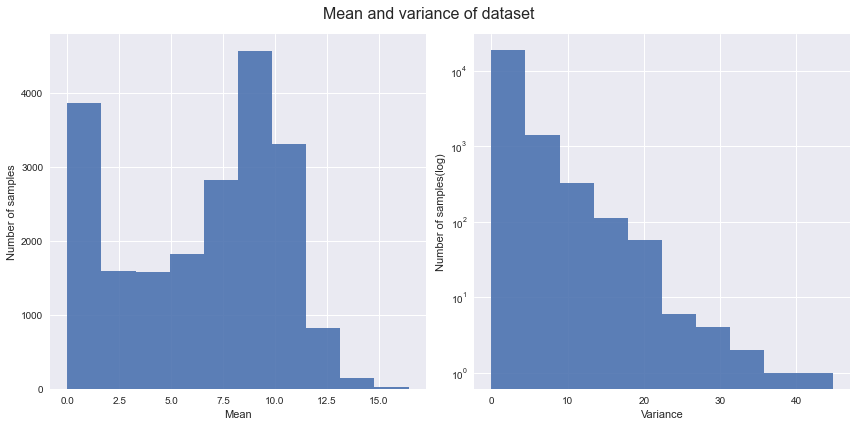

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].hist(data.mean(), alpha = 0.9)
axs[0].set(xlabel='Mean', ylabel='Number of samples')
#axs[0].set_title('Mean')

axs[1].hist(data.var(), alpha = 0.9)
#axs[1].set_title('Variance')
axs[1].set(xlabel='Variance', ylabel='Number of samples(log)')
axs[1].set_yscale('log')

fig.suptitle('Mean and variance of dataset', fontsize=16)
plt.tight_layout()
print(f'Min var: {data.var().min()}')
print(f'# of features with var=0: {(data.var()==0).sum()}')
print(f'Max var: {data.var().max()}')

The means of the features vary as we see in the above plot. Most features seem to have means close to 0 or around 10. The variances are generally low, but go as high as 44.76 for the feature with the highest variance. The amount of features that exhibit high variance like this decrease exponentially with variance however, so they are quite rare comparatively. I also found 267 constant features (with 0 variance).

### Task 2
- Perform variance filtering and reduce the number of features to about 5000.
- Check the means and variances for each feature again. Is there a need to center and standardize the data?

In [53]:
#var_filtered_data = data.iloc[data.var() > 5]
#print(data.var() > 5)
variance = data.var()
columns = data.columns

variable = []
threshold = 2

for i in range(0, len(variance)):
    if variance[i] >= threshold:
        variable.append(columns[i])

print(len(variable))

var_filtered_data = data[variable]
var_filtered_data.head()

5587


,gene_18,gene_21,gene_26,gene_28,gene_29,gene_30,gene_31,gene_33,gene_39,gene_44,...,gene_20466,gene_20472,gene_20476,gene_20484,gene_20490,gene_20500,gene_20504,gene_20514,gene_20524,gene_20529
sample_0,0.591871,0.000000,7.215116,6.620204,9.513538,0.0,4.063658,4.747656,0.000000,1.010279,...,4.377061,1.010279,9.175285,2.717803,0.000000,5.902800,2.602077,7.128881,7.220030,5.286759
sample_1,0.000000,0.000000,9.949812,1.174790,4.926991,0.0,0.000000,1.327170,0.811142,2.651224,...,2.530820,0.587845,0.000000,4.516185,4.008227,1.004394,0.811142,6.047558,6.256586,2.094168
sample_2,1.683023,3.660427,6.096650,7.680507,3.119439,0.0,0.452595,0.000000,0.452595,0.000000,...,6.172313,0.000000,8.834108,6.535353,2.337254,0.000000,5.014445,6.661493,5.401607,1.683023
sample_3,1.267356,0.000000,3.913761,6.469165,7.029895,0.0,1.267356,7.742714,0.434882,1.931418,...,6.318335,0.000000,7.529188,4.466457,0.434882,5.075383,6.233192,7.613915,8.942805,3.292001
sample_4,0.889707,0.000000,1.942120,5.861429,7.755709,0.0,0.649386,2.612801,0.649386,0.000000,...,6.775999,5.370398,7.647883,0.889707,2.045093,3.954001,4.586531,6.505099,7.181162,5.110372


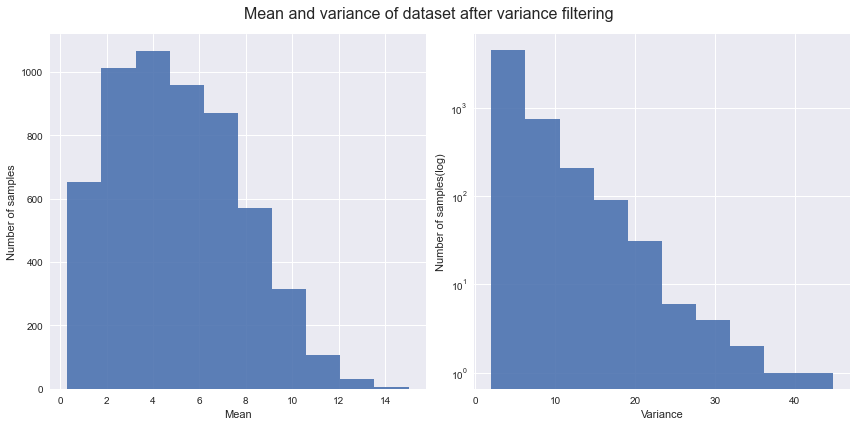

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].hist(var_filtered_data.mean(), alpha=0.9)
axs[0].set(xlabel='Mean', ylabel='Number of samples')
#axs[0].set_title('Mean')

axs[1].hist(var_filtered_data.var(), alpha=0.9)
axs[1].set(xlabel='Variance', ylabel='Number of samples(log)')
#axs[1].set_title('Variance')
axs[1].set_yscale('log')

fig.suptitle('Mean and variance of dataset after variance filtering', fontsize=16)
plt.tight_layout()

### Task 3

- Perform a Principal Component Analysis on the reduced dataset and look at some pair-plots between the first few principal components.
- Are any patterns visible?
- Also look at the eigenvalues of the principal components (scree plot). Is there a potential to reduce the dimension of the dataset even more? If so, perform a dimension reduction and only work with the selected principal components. If not, work with the original dataset after variance filtering.

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) # n_components ?
principal_components = pca.fit_transform(var_filtered_data)
print(pca.explained_variance_ratio_[:pca.n_components])

principalDF = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

finalDF = pd.concat([principalDF, labels.reset_index()['Class']], axis=1)

[0.18374285 0.11468524 0.10506603 0.07249052 0.03199347]


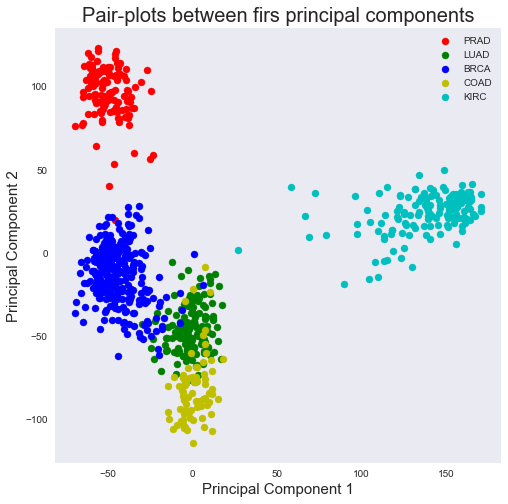

In [77]:
# Kanske strunta i den här, den nedan var eventuellt smidigare
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Pair-plots between firs principal components', fontsize = 20)
targets = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
colors = ['r', 'g', 'b', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

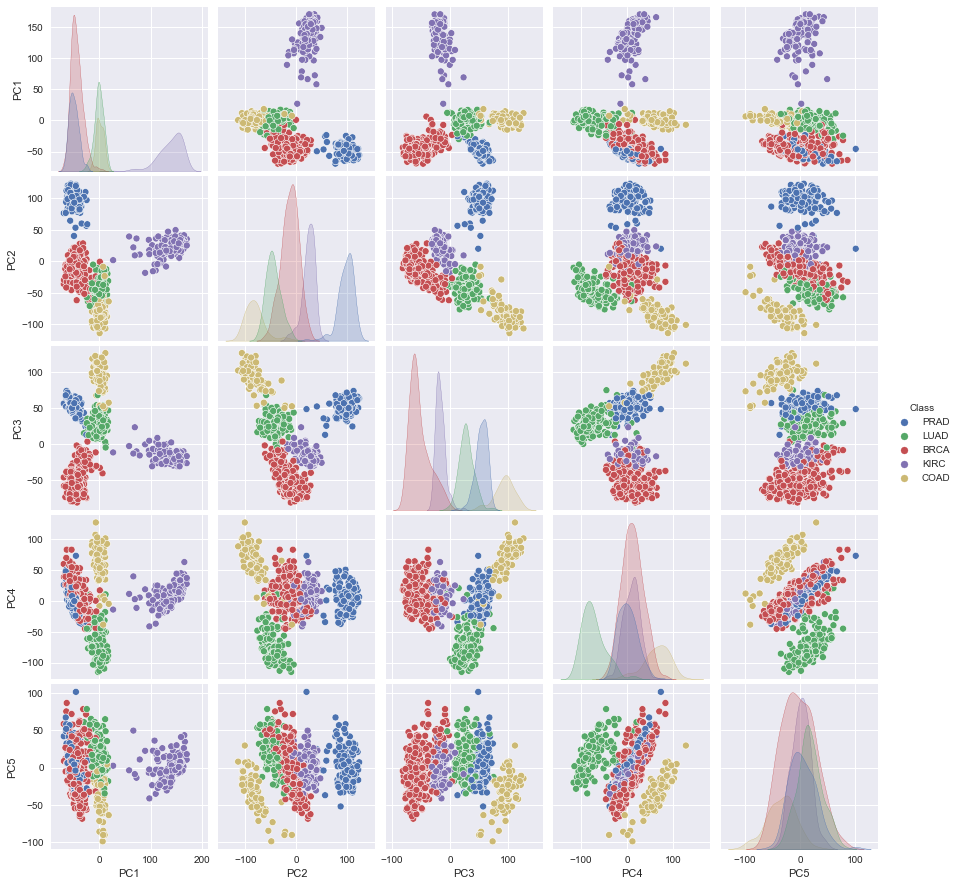

In [78]:
import seaborn as sns
plt.style.use('seaborn')

grid = sns.pairplot(finalDF, hue="Class")

A pattern I see is that the first PC is separating 'KIRC' very well from the rest, regardless of which PC it is combined with. Combinations with the first to about the third PC seem visually to have quite good separation between all clusters, but the quality of overall separation is generally worse the closer you look to the lower right corner. 

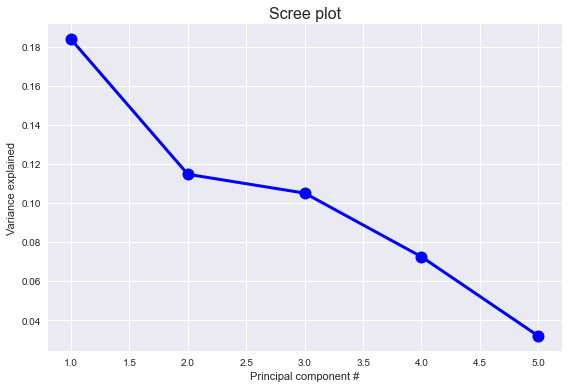

In [82]:
PC_vals = np.arange(pca.n_components_) + 1
plt.plot(PC_vals, pca.explained_variance_ratio_, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.title('Scree plot',fontsize=16)
plt.xlabel('Principal component #')
plt.ylabel('Variance explained')
plt.tight_layout()
plt.show()

A scree plot with 10 principal components was also made, which showed that the eigenvalues of principal components past 5 were similarly low, decreasing at about the same rate as between 5 & 6. 

*I decided to show 6 PCs to give an indication of what "angle" the eigenvalues plateau towards after 5, but that might not be necessary. (Maybe show more, 7-10 and then reduce after this point?)*

# Q 1.2

### Task 4

In [59]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [60]:
cluster_df = finalDF.copy()
labels = cluster_df.pop('Class')
cluster_data = cluster_df.values
n_kmeans = []
km_silhoutte_score = []
km_calinski_score = []
km_davies_score = []
gmm_silhoutte_score = []
gmm_calinski_score = []
gmm_davies_score = []

In [61]:
for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters=n_cluster, init ='k-means++', random_state=0).fit(cluster_data)
    gmm = GaussianMixture(n_components=n_cluster)
    kmeans_labels = kmeans.labels_
    gmm_labels = gmm.fit_predict(cluster_data)
    km_silhoutte_score.append(metrics.silhouette_score(cluster_data, kmeans_labels, metric='euclidean'))
    km_calinski_score.append(metrics.calinski_harabasz_score(cluster_data, kmeans_labels))
    km_davies_score.append(metrics.davies_bouldin_score(cluster_data, kmeans_labels))
    gmm_silhoutte_score.append(metrics.silhouette_score(cluster_data, gmm_labels, metric='euclidean'))
    gmm_calinski_score.append(metrics.calinski_harabasz_score(cluster_data, gmm_labels))
    gmm_davies_score.append(metrics.davies_bouldin_score(cluster_data, gmm_labels))
    n_kmeans.append(kmeans.inertia_)

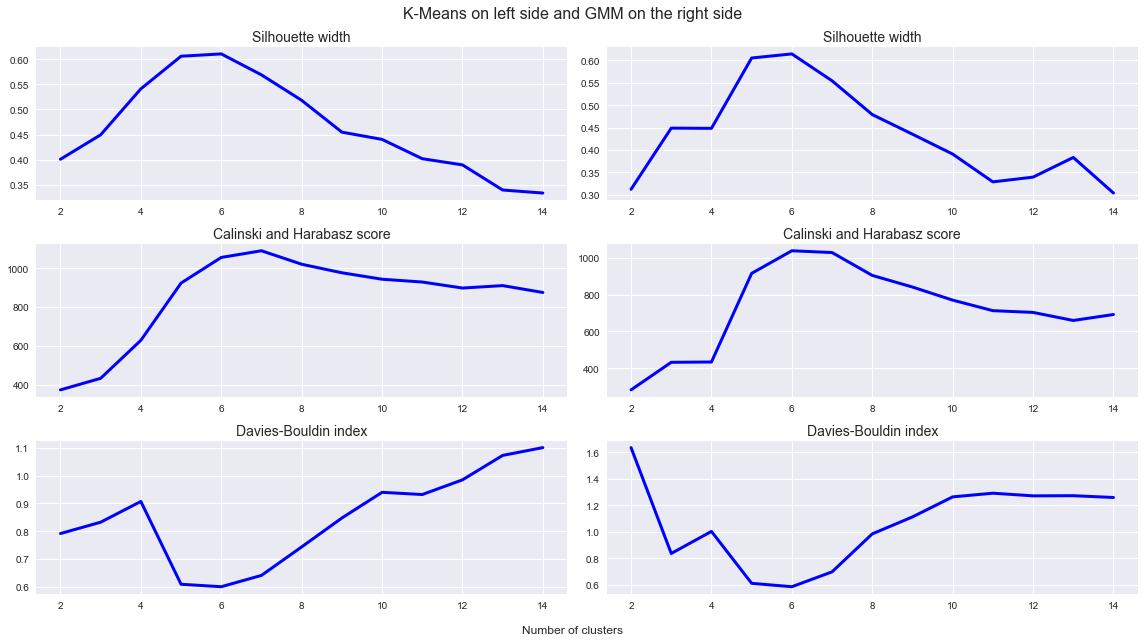

In [87]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16,9))
axs[0,0].plot(range(2,15),km_silhoutte_score, color='blue', linewidth=3)
axs[0,0].set_title('Silhouette width', fontsize=14)
axs[1,0].plot(range(2,15),km_calinski_score, color='blue', linewidth=3)
axs[1,0].set_title('Calinski and Harabasz score', fontsize=14)
axs[2,0].plot(range(2,15),km_davies_score, color='blue', linewidth=3)
axs[2,0].set_title('Davies-Bouldin index', fontsize=14)
axs[0,1].plot(range(2,15),gmm_silhoutte_score, color='blue', linewidth=3)
axs[0,1].set_title('Silhouette width', fontsize=14)
axs[1,1].plot(range(2,15),gmm_calinski_score, color='blue', linewidth=3)
axs[1,1].set_title('Calinski and Harabasz score',fontsize=14)
axs[2,1].plot(range(2,15),gmm_davies_score, color='blue', linewidth=3)
axs[2,1].set_title('Davies-Bouldin index', fontsize=14)
fig.supxlabel('Number of clusters')
plt.suptitle('K-Means on left side and GMM on the right side', fontsize=16)
plt.tight_layout()
plt.show()

Using K-Means with 5 cluster

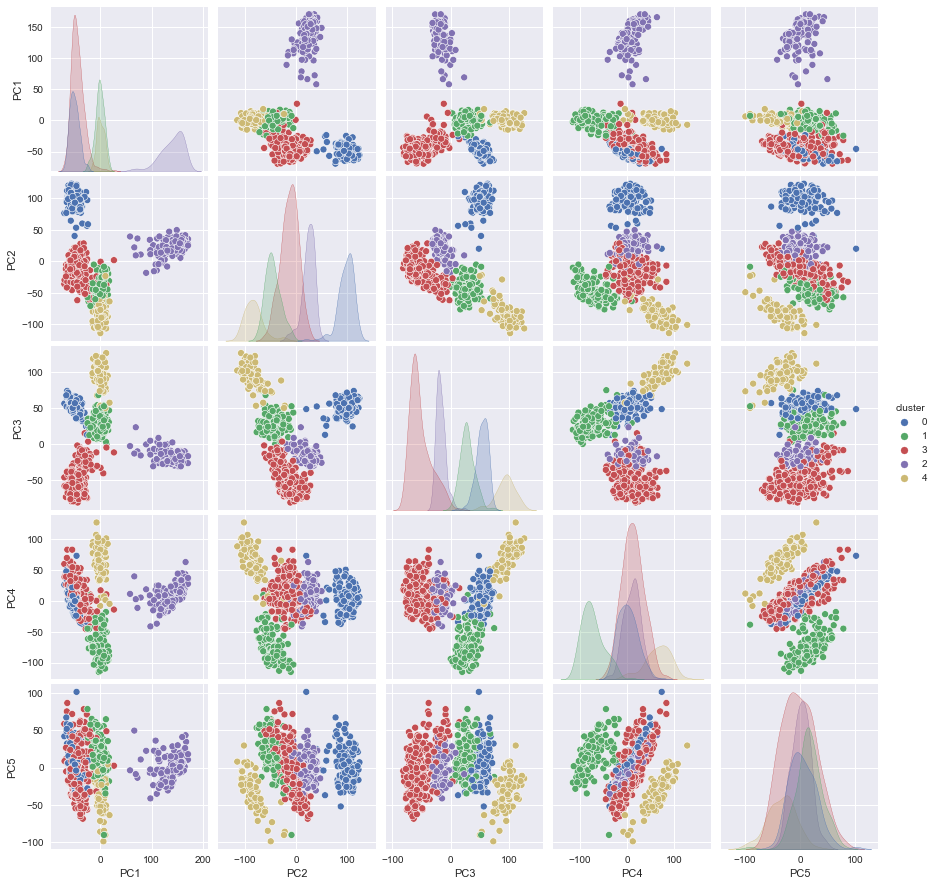

In [102]:
kmeans = KMeans(n_clusters=5, init ='k-means++', random_state=0).fit(cluster_data)
kmeans_labels = kmeans.labels_
pairplot_labels = [str(label) for label in kmeans_labels]
kmeans_df = finalDF.copy()
kmeans_df = kmeans_df.drop(columns=['Class'])
kmeans_df['cluster'] = pairplot_labels
sns.color_palette("tab10")
grid = sns.pairplot(kmeans_df, hue="cluster")

Using GMM with 5 cluster

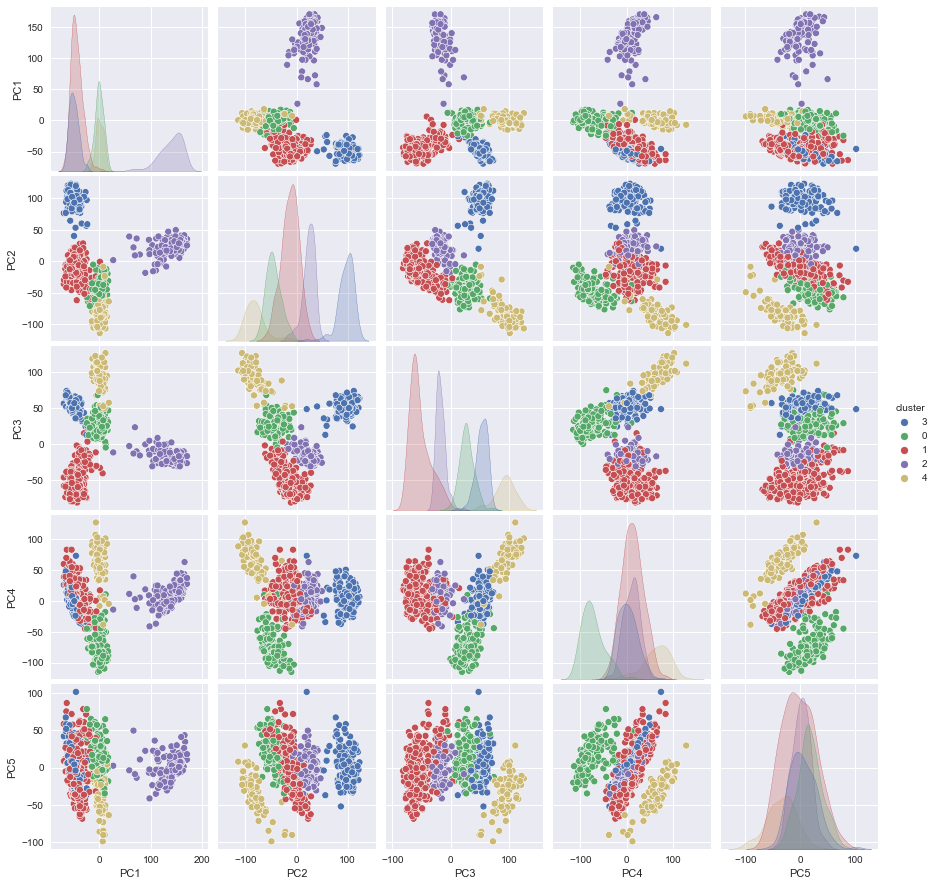

In [89]:
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(cluster_data)
pairplot_labels = [str(label) for label in gmm_labels]
kmeans_df = finalDF.copy()
kmeans_df = kmeans_df.drop(columns=['Class'])
kmeans_df['cluster'] = pairplot_labels
sns.color_palette("tab10")
grid = sns.pairplot(kmeans_df, hue="cluster")

Compare results with true labels

In [67]:
from collections import defaultdict, Counter

In [103]:
km_cluster_classes = defaultdict()
gmm_cluster_classes = defaultdict()
for kmm_guess, gmm_guess, true_label in zip(kmeans_labels, gmm_labels, labels):
    if kmm_guess in km_cluster_classes:
        km_cluster_classes[kmm_guess].append(true_label)
    else:
        km_cluster_classes[kmm_guess] = [true_label]
    
    if gmm_guess in gmm_cluster_classes:
        gmm_cluster_classes[gmm_guess].append(true_label)
    else:
        gmm_cluster_classes[gmm_guess] = [true_label]

<AxesSubplot:title={'center':'Accuracy K-Means'}>

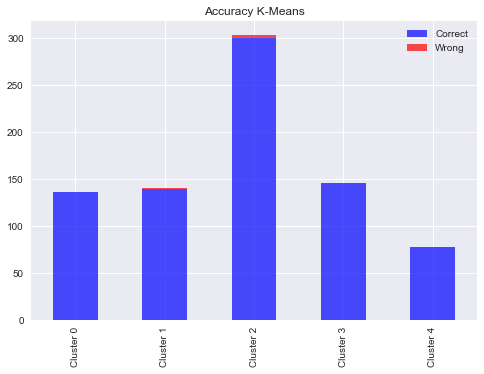

In [104]:
acc_df = pd.DataFrame(columns=['Correct', 'Wrong'])
for key in km_cluster_classes.keys():
    class_count = Counter(km_cluster_classes[key])
    correct = class_count.most_common(1)[0][1]
    row = {'Correct': correct, 'Wrong': len(km_cluster_classes[key])-correct}
    test = len(acc_df)
    acc_df.loc[test] = row

acc_df.index=['Cluster 0','Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4']
acc_df.plot(kind='bar',stacked=True, title='Accuracy K-Means', color=['b', 'r'], alpha = 0.7)

<AxesSubplot:title={'center':'Accuracy GMM'}>

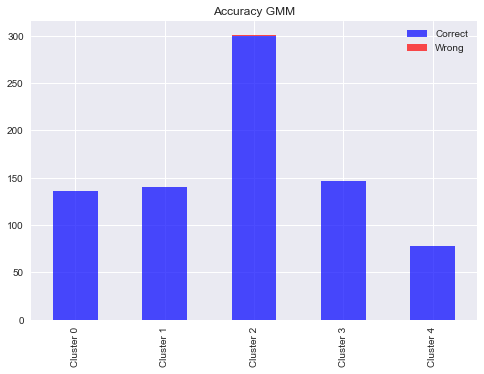

In [98]:
acc_df = pd.DataFrame(columns=['Correct', 'Wrong'])
for key in gmm_cluster_classes.keys():
    class_count = Counter(gmm_cluster_classes[key])
    correct = class_count.most_common(1)[0][1]
    row = {'Correct': correct, 'Wrong': len(gmm_cluster_classes[key])-correct}
    test = len(acc_df)
    acc_df.loc[test] = row

acc_df.index=['Cluster 0','Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4']
acc_df.plot(kind='bar',stacked=True, title='Accuracy GMM', color=['b', 'r'],alpha = 0.7)

Fraction of outliers: 0.004993757802746567


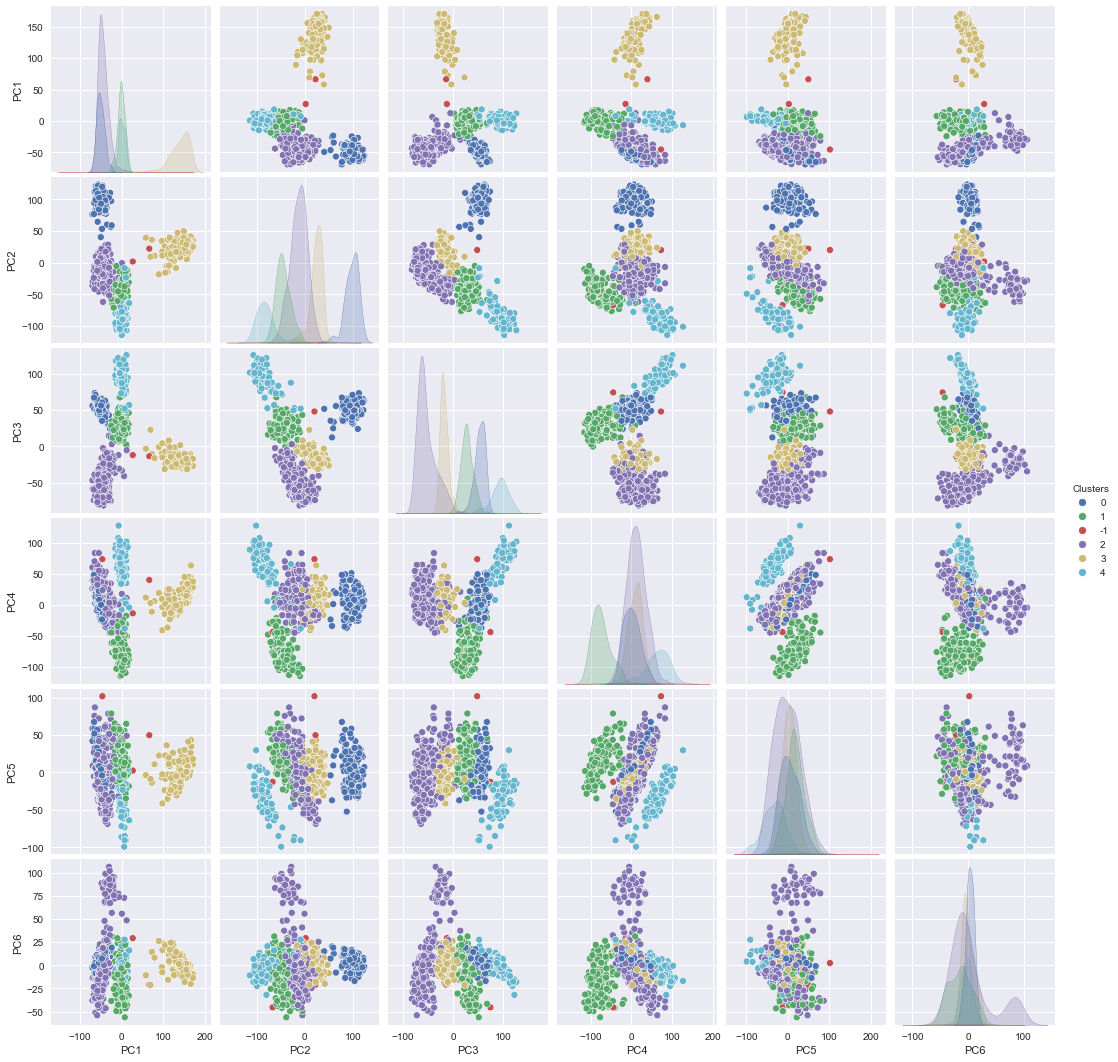

In [71]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5, max_eps=50, cluster_method='dbscan')
optics_labels = optics.fit(cluster_data).labels_
print(f'Fraction of outliers: {optics_labels[optics_labels==-1].sum()*-1 / len(optics_labels)}')
opticsDF = finalDF.copy().drop(columns=['Class'])
opticsDF['Clusters'] = [str(x) for x in optics_labels]

grid = sns.pairplot(opticsDF, hue="Clusters")